# Problem Set 3

## Question 1

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

users = pd.read_csv(url, delimiter='|')
users = pd.read_csv(url, delimiter='|')

mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)
def male_ratio(x):
    if x['gender'] == 'M':
        return 1
    else:
        return 0

users['male_ratio'] = users.apply(male_ratio, axis=1)
male_ratio_by_occupation = users.groupby('occupation')['male_ratio'].mean()
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)
print(male_ratio_by_occupation)

age_range_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(age_range_by_occupation)

mean_age_by_occ_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occ_and_sex)

total_by_occupation = users.groupby('occupation')['gender'].count()
total_males_by_occupation = users.groupby('occupation')['male_ratio'].sum()
total_females_by_occupation = total_by_occupation - total_males_by_occupation

male_percentage_by_occupation = (total_males_by_occupation / total_by_occupation) * 100
female_percentage_by_occupation = (total_females_by_occupation / total_by_occupation) * 100

gender_percentage_by_occupation = pd.concat([male_percentage_by_occupation, female_percentage_by_occupation], axis=1)
gender_percentage_by_occupation.columns = ['Male', 'Female']

print(gender_percentage_by_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.57

## Question 2

In [12]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/euro2012.csv'
euro12 = pd.read_csv(url)
goals = euro12['Goals']
teams_count = euro12['Team'].nunique()
print(teams_count)
print(len(euro12.columns))
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)
teams_more_than_six_goals = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print(teams_more_than_six_goals)
teams_starts_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']
print(teams_starts_with_G)
first_seven_columns = euro12.iloc[:, :7]
print(first_seven_columns)


HTTPError: HTTP Error 404: Not Found

## Quesiton 3

In [2]:
import pandas as pd
import numpy as np

ser1 = pd.Series(np.random.randint(1, 5, size=100))
ser2 = pd.Series(np.random.randint(1, 4, size=100))
ser3 = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([ser1, ser2, ser3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([ser1, ser2, ser3], axis=0)
print("Is it true that bigcolumn only goes up to index 99? ", bigcolumn.index.max() == 99)

bigcolumn = bigcolumn.reset_index(drop=True)
df = df.reset_index(drop=True)
df = pd.concat([df, bigcolumn], axis=1)


Is it true that bigcolumn only goes up to index 99?  True


## Question 4

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv("wind.txt", delim_whitespace=True, parse_dates=[[0, 1, 2]])

data = data.set_index('Yr_Mo_Dy')


def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year * 10000 + x.month * 100 + x.day, format='%Y%m%d')

data.index = data.index.map(fix_year)
missing_values_count = data.isnull().sum()
non_missing_count = data.notnull().sum().sum()
mean_windspeeds = data.mean().mean()


loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})


january_data = data[data.index.month == 1]
january_average = january_data.mean()

weekly_data = data.resample('W', closed='left', label='left').mean().iloc[:52]
weekly_stats = pd.DataFrame({
    'min': weekly_data.min(axis=1),
    'max': weekly_data.max(axis=1),
    'mean': weekly_data.mean(axis=1),
    'std': weekly_data.std(axis=1)
})

print(weekly_stats)


                  min        max       mean       std
Yr_Mo_Dy                                             
1961-01-01   6.804286  14.124286  10.182262  2.585866
1961-01-08   5.135714  12.422857   8.895000  2.688046
1961-01-15   6.357143  13.554286   9.242639  2.378738
1961-01-22  10.524286  20.607143  14.920476  2.978190
1961-01-29   9.091429  16.482857  12.655893  2.623683
1961-02-05  11.238571  20.964286  16.036548  2.969975
1961-02-12   9.840000  20.564286  13.694881  2.940274
1961-02-19   7.410000  17.275714  11.719524  2.708721
1961-02-26   8.572857  19.450000  13.123929  2.729939
1961-03-05   5.221429  15.427143  10.075357  2.666391
1961-03-12   7.667143  20.665714  12.715873  3.473851
1961-03-19   6.268571  16.540000   9.801429  2.811322
1961-03-26   8.160000  15.257143  11.278036  1.967494
1961-04-02   5.221429  12.465714   8.756190  2.388746
1961-04-09   5.625714  10.202857   7.659881  1.700484
1961-04-16   6.720000  13.882857   9.456429  2.256780
1961-04-23   5.391429  10.19

## Question 5

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo = pd.read_csv(url, sep='\t')
chipo.head(10)

chipo.shape[0]   
chipo.shape[1]   
print(chipo.columns.tolist())   
chipo.index    
most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1).index[0]
print(most_ordered_item)   
most_ordered_item_quantity = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1).iloc[0]['quantity']
print(most_ordered_item_quantity)    
most_ordered_choice = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1).index[0]
print(most_ordered_choice)    
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)   


chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Checking the item price type
print(chipo['item_price'].dtype)  
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)    

orders_count = chipo.order_id.nunique()

average_revenue_per_order = revenue / orders_count
print(average_revenue_per_order)    
items_sold = chipo['item_name'].nunique()
print(items_sold)    


['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']
Chicken Bowl
761
[Diet Coke]
4972
float64
39237.02
21.39423118865867
50


## Question 6

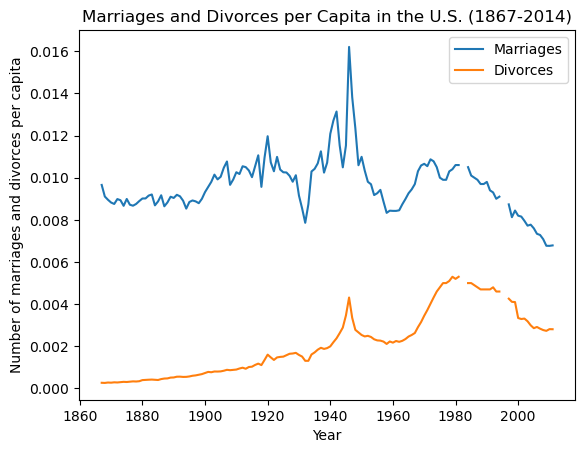

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col=0)

# Calculate the number of marriages and divorces per capita
df['Marriages_per_capita'] = df['Marriages']/df['Population']
df['Divorces_per_capita'] = df['Divorces']/df['Population']

# Create a line plot
plt.plot(df.index, df['Marriages_per_capita'], label='Marriages')
plt.plot(df.index, df['Divorces_per_capita'], label='Divorces')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Show the plot
plt.show()


## Question 7

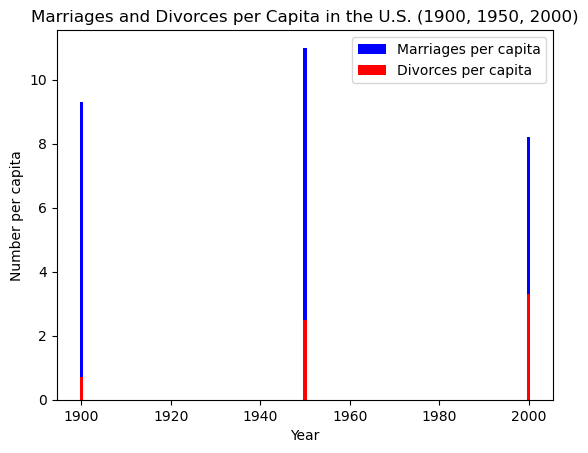

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data from csv file
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Filtering the data for years 1900, 1950, and 2000
years = [1900, 1950, 2000]
data = data[data['Year'].isin(years)]


plt.bar(data['Year'], data['Marriages_per_1000'], color='blue', label='Marriages per capita')
plt.bar(data['Year'], data['Divorces_per_1000'], color='red', label='Divorces per capita')

plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')


plt.legend()


plt.show()


## Question 8

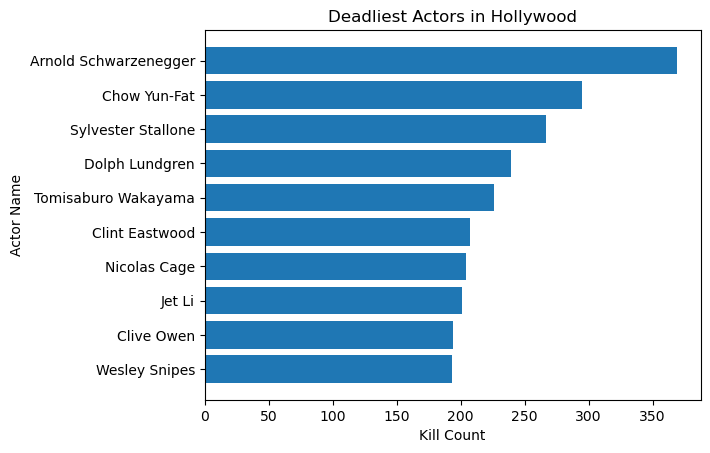

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('actor_kill_counts.csv')

data = data.sort_values('Count')


plt.barh(data['Actor'], data['Count'])

plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Kill Count')
plt.ylabel('Actor Name')

# Show the plot
plt.show()


## Question 9

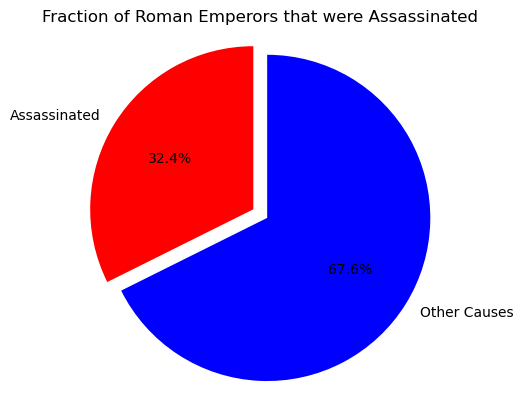

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('roman-emperor-reigns.csv')


assassinated = data[data['Cause_of_Death'] == 'Assassinated']
fraction_assassinated = len(assassinated) / len(data)


other = data[data['Cause_of_Death'] != 'Assassinated']
fraction_other = len(other) / len(data)


labels = ['Assassinated', 'Other Causes']
sizes = [fraction_assassinated, fraction_other]
colors = ['red', 'blue']
explode = (0.1, 0)  # Explode the "Assassinated" slice
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)


plt.axis('equal')


plt.title('Fraction of Roman Emperors that were Assassinated')


plt.show()


## Question 10

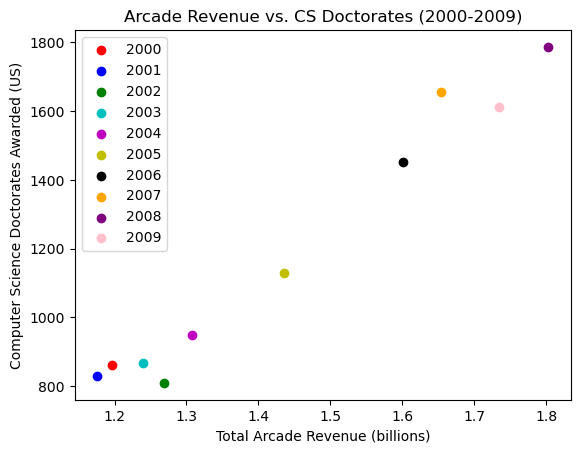

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

year_2000 = data[data['Year'] == 2000]
year_2001 = data[data['Year'] == 2001]
year_2002 = data[data['Year'] == 2002]
year_2003 = data[data['Year'] == 2003]
year_2004 = data[data['Year'] == 2004]
year_2005 = data[data['Year'] == 2005]
year_2006 = data[data['Year'] == 2006]
year_2007 = data[data['Year'] == 2007]
year_2008 = data[data['Year'] == 2008]
year_2009 = data[data['Year'] == 2009]


plt.scatter(year_2000['Total Arcade Revenue (billions)'], year_2000['Computer Science Doctorates Awarded (US)'], c='r', label='2000')
plt.scatter(year_2001['Total Arcade Revenue (billions)'], year_2001['Computer Science Doctorates Awarded (US)'], c='b', label='2001')
plt.scatter(year_2002['Total Arcade Revenue (billions)'], year_2002['Computer Science Doctorates Awarded (US)'], c='g', label='2002')
plt.scatter(year_2003['Total Arcade Revenue (billions)'], year_2003['Computer Science Doctorates Awarded (US)'], c='c', label='2003')
plt.scatter(year_2004['Total Arcade Revenue (billions)'], year_2004['Computer Science Doctorates Awarded (US)'], c='m', label='2004')
plt.scatter(year_2005['Total Arcade Revenue (billions)'], year_2005['Computer Science Doctorates Awarded (US)'], c='y', label='2005')
plt.scatter(year_2006['Total Arcade Revenue (billions)'], year_2006['Computer Science Doctorates Awarded (US)'], c='k', label='2006')
plt.scatter(year_2007['Total Arcade Revenue (billions)'], year_2007['Computer Science Doctorates Awarded (US)'], c='orange', label='2007')
plt.scatter(year_2008['Total Arcade Revenue (billions)'], year_2008['Computer Science Doctorates Awarded (US)'], c='purple', label='2008')
plt.scatter(year_2009['Total Arcade Revenue (billions)'], year_2009['Computer Science Doctorates Awarded (US)'], c='pink', label='2009')


plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. CS Doctorates (2000-2009)')


plt.legend()


plt.show()
